Радькин Кирилл Б01-009
номер VI.9.32

In [2]:
import numpy as np
import pandas as pd
# %matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

ModuleNotFoundError: No module named 'pandas'

Полином в форме Ньютона

In [ ]:
def divided_difference (x, y, first_i, last_i):
    if first_i == last_i:
        return y[first_i]
        
    return (divided_difference (x, y, first_i + 1, last_i) - divided_difference (x, y, first_i, last_i - 1)) / (x[last_i] - x[first_i])

In [ ]:
x = np.arange (1910, 2001, 10)
x

array([1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000])

In [ ]:
y = np.array ([92228496, 106021537, 123202624, 132164569, 151325798, 179323175,  203211926, 226545805, 248709873, 281421906])
y

array([ 92228496, 106021537, 123202624, 132164569, 151325798, 179323175,
       203211926, 226545805, 248709873, 281421906])

In [ ]:
coef = np.zeros (x.size)
for i in range (coef.size):
    coef[i] = divided_difference (x, y, 0, i)

In [ ]:
coef

array([ 9.22284960e+07,  1.37930410e+06,  1.69402300e+04, -1.93453133e+03,
        1.25106725e+02, -4.15059800e+00,  8.05654167e-02, -7.56485278e-04,
       -7.56467535e-06,  5.09932804e-07])

In [ ]:
def get_polynomial_value (div_diff, x_div, x):
    assert (div_diff.size == x_div.size)
    
    res = 0

    for i in range (div_diff.size):
        tmp_res = 1
        for j in range (i):
            tmp_res *= (x - x_div[j])
        
        res += div_diff[i] * tmp_res

    return res

Сплайн

In [ ]:
def tridiagonal (h, y):
    a = np.zeros (y.size)
    b = np.zeros (y.size)
    c = np.zeros (y.size)
    f = np.zeros (y.size)

    b[0] = b[-1] = 1

    for i in range (1, y.size - 1):
        a[i] = h[i] / 6
        b[i] = (h[i] + h[i + 1]) / 3
        c[i] = h[i + 1] / 6
        f[i] = (y[i + 1] - y[i]) / h[i + 1] - (y[i] - y[i - 1]) / h[i]

    alpha = np.zeros (y.size)
    beta = np.zeros (y.size)

    for i in range(y.size - 1):
        alpha[i + 1] = - c[i] / (a[i] * alpha[i] + b[i])
        beta[i+1]  = (f[i] - a[i] * beta[i]) / (a[i] * alpha[i] + b[i])
    
    x = np.zeros(y.size)
    x[y.size - 1] = (f[y.size - 1] - a[y.size - 1] * beta[y.size - 1]) / (a[y.size - 1] * alpha[y.size - 1] + b[y.size - 1])

    for i in reversed(range(y.size - 1)):
        x[i] = alpha[i + 1] * x[i + 1] + beta[i + 1]

    return x

In [ ]:
h = np.zeros (x.size)

for i in range (1, h.size):
    h[i] = x[i] - x[i - 1]

c = tridiagonal (h, y)
a = np.zeros (x.size)
b = np.zeros (x.size)
d = np.zeros (x.size)

for i in range(1, len(d)):
        a[i] = y[i]
        d[i] = (c[i] - c[i-1]) / h[i]
        b[i] = (2 * c[i] + c[i-1]) / 6 * h[i] + (y[i] - y[i - 1]) / h[i]

S = lambda X, i: a[i] + b[i] * (X - x[i]) + 0.5 * c[i] * ((X - x[i]) ** 2) + 1/6 * d[i] * ((X - x[i]) ** 3)

def get_spline_value (x_, y_, x_val):
    if x_val <= x_[1]:
        return S(x_val, 1)
    
    elif x_val > x_[-1]:
        return S(x_val, -1)

    else:
        for i in range (1, x_.size):
            if x_val > x_[i - 1] and x_val <= x_[i]:
                return S(x_val, i)


Результат

In [ ]:
print ("Истинное значение на 2010 год:  308745538")
print ("Полином в форме ньютона на 2010 год: ", int(get_polynomial_value (coef, x, 2010)))
print ("Сплайн: ", int (get_spline_value (x, y, 2010)))

Истинное значение на 2010 год:  308745538
Полином в форме ньютона на 2010 год:  10640486053
Сплайн:  314133939


C:\Users\hokey\AppData\Local\Temp\ipykernel_14076\2221389413.py:9: RuntimeWarning: overflow encountered in long_scalars
  tmp_res *= (x - x_div[j])


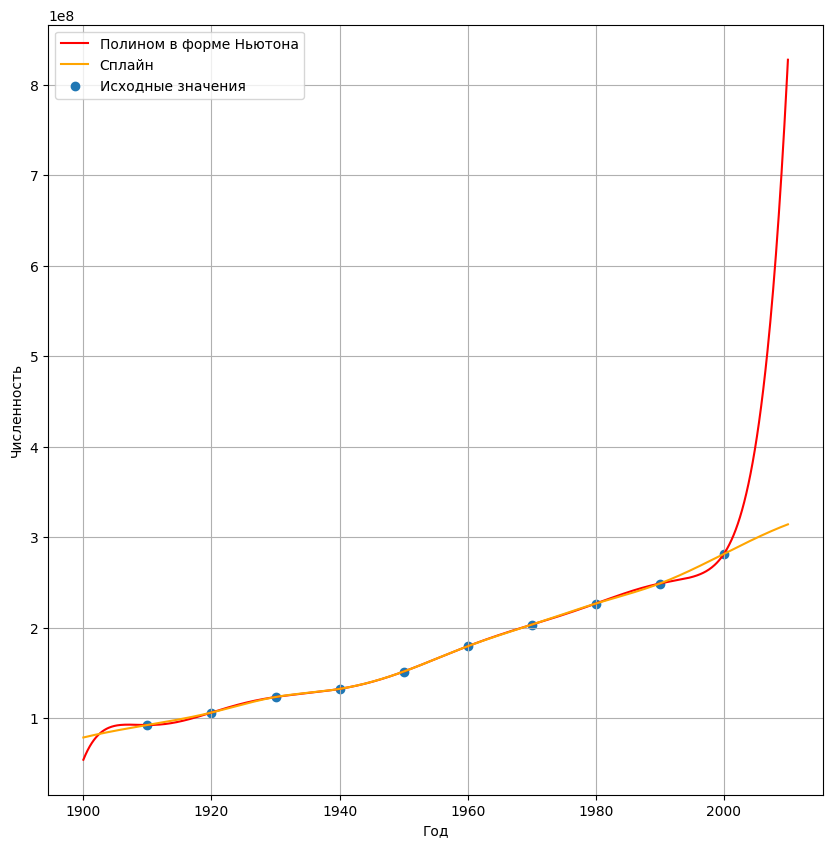

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=[10, 10])

plt.xlabel ("Год")
plt.ylabel ("Численность")

new_x = np.linspace (1900, 2010, 1000)
plt.plot (new_x, get_polynomial_value (coef, x, new_x), label="Полином в форме Ньютона", color="red")

spline_y = np.array ([get_spline_value(x, y, i) for i in new_x])
plt.plot (new_x, spline_y, label="Сплайн", color="orange")

plt.scatter (x, y, label="Исходные значения")

plt.legend()
plt.grid()
plt.show()
plt.savefig("./picturies/graph1.png", dpi=100)